In [1]:
#pip install xgboost

In [2]:
# Importing related libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import tensorflow as tf
import keras
import autokeras as ak
import random
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math
from xgboost import XGBClassifier
from xgboost import XGBRegressor

In [3]:
# Set seed to make sure the code to be reproducible
random.seed(123)
np.random.seed(123)
tf.random.set_seed(123)

In [4]:
# Import the dataset
filename = 'norwegian_dataset.csv'
training_data = pd.read_csv(filename, index_col = False)
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6.0,0.391600,0.709900,2.480200,0.665700,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6.0,0.391100,0.721212,2.502200,0.669454,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6.0,0.407800,0.728698,2.473100,0.702844,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6.0,0.407700,0.727200,2.481300,0.730400,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6.0,0.426000,0.704400,2.470900,0.677300,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1.0,0.166493,0.830020,2.334237,0.788812,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1.0,0.176284,0.858255,2.365948,0.819950,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1.0,0.183089,0.901830,2.379198,0.866326,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1.0,0.175724,0.919743,2.360352,0.888828,7/1-2 S,3160.062500


In [5]:
training_data['LITHOLOGY_GEOLINK'].unique()

array([ 6.,  7.,  5., 19., 16.,  4.,  2.,  1., 11., 12., 13., 18.,  3.,
       10.,  9., 15., 17., 22.])

In [6]:
df = training_data
df.loc[df["LITHOLOGY_GEOLINK"] == 9, "LITHOLOGY_GEOLINK"]  = 8
df.loc[df["LITHOLOGY_GEOLINK"] == 10, "LITHOLOGY_GEOLINK"] = 9
df.loc[df["LITHOLOGY_GEOLINK"] == 11, "LITHOLOGY_GEOLINK"]  = 10
df.loc[df["LITHOLOGY_GEOLINK"] == 12, "LITHOLOGY_GEOLINK"] = 11
df.loc[df["LITHOLOGY_GEOLINK"] == 13, "LITHOLOGY_GEOLINK"] = 12
df.loc[df["LITHOLOGY_GEOLINK"] == 15, "LITHOLOGY_GEOLINK"] = 13
df.loc[df["LITHOLOGY_GEOLINK"] == 16, "LITHOLOGY_GEOLINK"] = 14
df.loc[df["LITHOLOGY_GEOLINK"] == 17, "LITHOLOGY_GEOLINK"] = 15
df.loc[df["LITHOLOGY_GEOLINK"] == 18, "LITHOLOGY_GEOLINK"] = 16
df.loc[df["LITHOLOGY_GEOLINK"] == 19, "LITHOLOGY_GEOLINK"] = 17
df.loc[df["LITHOLOGY_GEOLINK"] == 22, "LITHOLOGY_GEOLINK"] = 18
training_data = df
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6.0,0.391600,0.709900,2.480200,0.665700,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6.0,0.391100,0.721212,2.502200,0.669454,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6.0,0.407800,0.728698,2.473100,0.702844,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6.0,0.407700,0.727200,2.481300,0.730400,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6.0,0.426000,0.704400,2.470900,0.677300,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1.0,0.166493,0.830020,2.334237,0.788812,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1.0,0.176284,0.858255,2.365948,0.819950,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1.0,0.183089,0.901830,2.379198,0.866326,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1.0,0.175724,0.919743,2.360352,0.888828,7/1-2 S,3160.062500


In [7]:
training_data['LITHOLOGY_GEOLINK'].unique()

array([ 6.,  7.,  5., 17., 14.,  4.,  2.,  1., 10., 11., 12., 16.,  3.,
        9.,  8., 13., 15., 18.])

In [8]:
training_data['LITHOLOGY_GEOLINK'] = training_data['LITHOLOGY_GEOLINK'].astype(int)

In [9]:
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6,0.391600,0.709900,2.480200,0.665700,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6,0.391100,0.721212,2.502200,0.669454,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6,0.407800,0.728698,2.473100,0.702844,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6,0.407700,0.727200,2.481300,0.730400,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6,0.426000,0.704400,2.470900,0.677300,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1,0.166493,0.830020,2.334237,0.788812,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1,0.176284,0.858255,2.365948,0.819950,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1,0.183089,0.901830,2.379198,0.866326,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1,0.175724,0.919743,2.360352,0.888828,7/1-2 S,3160.062500


In [10]:
# Convert the deep and medium resistivity to be in a form of Log based 10.
training_data["RDEP"] = np.log10(training_data["RDEP"])
training_data["RMED"] = np.log10(training_data["RMED"])
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6,0.391600,-0.148803,2.480200,-0.176721,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6,0.391100,-0.141937,2.502200,-0.174280,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6,0.407800,-0.137453,2.473100,-0.153141,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6,0.407700,-0.138346,2.481300,-0.136439,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6,0.426000,-0.152181,2.470900,-0.169219,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1,0.166493,-0.080911,2.334237,-0.103026,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1,0.176284,-0.066384,2.365948,-0.086213,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1,0.183089,-0.044875,2.379198,-0.062319,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1,0.175724,-0.036334,2.360352,-0.051182,7/1-2 S,3160.062500


In [11]:
# Convert the compressional and shear sonic logs into P- and S-waves velocities, in m/s
training_data['DTC'] = 100000/training_data['DTC']
training_data['DTS'] = 100000/training_data['DTS']
training_data.rename(columns={"DTC": "Vp", "DTS": "Vs"}, inplace = True)
training_data

,Vp,Vs,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,864.354985,373.319164,96.910202,6,0.391600,-0.148803,2.480200,-0.176721,15/9-23,2315.461914
1,862.738304,367.195897,108.976501,6,0.391100,-0.141937,2.502200,-0.174280,15/9-23,2315.614502
2,859.731392,356.882324,126.231796,6,0.407800,-0.137453,2.473100,-0.153141,15/9-23,2315.766846
3,852.451690,352.642505,149.429504,6,0.407700,-0.138346,2.481300,-0.136439,15/9-23,2315.919189
4,831.515102,343.942351,163.915497,6,0.426000,-0.152181,2.470900,-0.169219,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,975.433690,786.915040,30.631025,1,0.166493,-0.080911,2.334237,-0.103026,7/1-2 S,3159.605469
184715,974.116774,786.938048,32.643269,1,0.176284,-0.066384,2.365948,-0.086213,7/1-2 S,3159.757812
184716,973.699375,786.934316,36.831581,1,0.183089,-0.044875,2.379198,-0.062319,7/1-2 S,3159.910156
184717,980.483463,786.996119,41.760101,1,0.175724,-0.036334,2.360352,-0.051182,7/1-2 S,3160.062500


In [12]:
# Rename the Facies header from "LITHOLOGY_GEOLINK" into "Facies", for convenience.
training_data.rename(columns = {'LITHOLOGY_GEOLINK':'Facies'}, inplace = True)
training_data

,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,864.354985,373.319164,96.910202,6,0.391600,-0.148803,2.480200,-0.176721,15/9-23,2315.461914
1,862.738304,367.195897,108.976501,6,0.391100,-0.141937,2.502200,-0.174280,15/9-23,2315.614502
2,859.731392,356.882324,126.231796,6,0.407800,-0.137453,2.473100,-0.153141,15/9-23,2315.766846
3,852.451690,352.642505,149.429504,6,0.407700,-0.138346,2.481300,-0.136439,15/9-23,2315.919189
4,831.515102,343.942351,163.915497,6,0.426000,-0.152181,2.470900,-0.169219,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,975.433690,786.915040,30.631025,1,0.166493,-0.080911,2.334237,-0.103026,7/1-2 S,3159.605469
184715,974.116774,786.938048,32.643269,1,0.176284,-0.066384,2.365948,-0.086213,7/1-2 S,3159.757812
184716,973.699375,786.934316,36.831581,1,0.183089,-0.044875,2.379198,-0.062319,7/1-2 S,3159.910156
184717,980.483463,786.996119,41.760101,1,0.175724,-0.036334,2.360352,-0.051182,7/1-2 S,3160.062500


In [13]:
training_data["WELL"].unique()

array(['15/9-23', '16/10-3 Tyr Central', '16/10-5 Isbjoern',
       '16/2-11 A Johan Sverdrup Appr', '16/2-16', '16/2-6',
       '16/2-7 Johan Sverdrup Appr', '16/5-3 Johan Sverdrup Appr',
       '16/7-6', '25/10-10  Balder Triassic', '25/10-9 Aegis',
       '25/11-19 S  Balder Appr', '25/11-24 Jakob South',
       '25/8-5 S  Jotun', '31/2-19 S', '31/2-21 S', '31/3-4', '32/2-1',
       '33/6-3 S', '34/10-35', '34/11-1', '34/3-1 A', '34/3-2 S',
       '34/3-3 A', '34/4-10 R', '34/5-1 A', '34/5-1 S', '34/6-1',
       '35/11-10', '35/11-11', '35/11-13', '35/11-5', '35/11-6',
       '35/3-7 S', '35/6-2 S', '35/8-6 S', '35/9-10 S', '35/9-2',
       '35/9-5', '35/9-7', '35/9-8', '35/9-9', '7/1-2 S'], dtype=object)

Remove a single well to use as a blind test later. In this case, the blind well is: 15/9-23

In [14]:
blind = training_data[training_data['WELL'] == '32/2-1']
training_data = training_data[training_data['WELL'] != '32/2-1']

In [15]:
blind['Facies'].unique()

array([ 5,  3, 14,  6])

In [16]:
training_data['Facies'].unique()

array([ 6,  7,  5, 17, 14,  4,  2,  1, 10, 11, 12, 16,  3,  9,  8, 13, 15,
       18])

In [17]:
training_data['WELL'] = training_data['WELL'].astype('category')

C:\Users\nandi\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
# Define facies colors and labels

# 1 = Sandstone, 2 = Silty sand, 3 = Cross Bedded Sst, 4 = Sandy Silt, 5 = Silt
# 6 = Shaly Silt, 7 = Silty Shale, 9 = Chalk, 10 = Porous LST, 11 = LST,
# 12 = Argillaceous Limestone, 13 = Marlstone, 15 = Dolomite, 16 = Calcareous Cement
# 17 = Conglomerate, 18 = Coal, 19 = Cinerite, 22 = Anhydrite

facies_colors = ['#FFFF00','#FDE992','#FFD700','#D2B48C','#FF9999','#FFCC00','#026440',
                 '#3d85c6','#6fa8dc','#9fc5e8','#1e90ff','#00bfff','#44ffff','#36cccc',
                 '#e3b778','#000000', '#227f7f', '#FF77FF']

facies_labels = ['SS', 'SiS', 'CSS', 'SSi', 'Si', 'ShSi', 'SiSh','Ch', 'PLS', 'LS','ALS','M','D','CC',
                 'COM','COAL','CIN','ANH']
#facies_color_map is a dictionary that maps facies labels
#to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ int(row['Facies']) -1]
    
training_data.loc[:,'FaciesLabels'] = training_data.apply(lambda row: label_facies(row, facies_labels), axis=1)
training_data.describe()

C:\Users\nandi\anaconda3\envs\tf\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,Depth
count,184478.000000,184478.000000,184478.000000,184478.000000,184478.000000,184478.000000,184478.000000,184478.000000,184478.000000
mean,1107.278161,555.299051,84.563754,7.098640,2.046763,0.438948,2.444904,0.441194,2723.474558
std,350.298750,228.740372,42.337080,3.529234,7.860809,0.455169,0.151253,0.456540,801.581173
min,261.159283,97.222720,0.207500,1.000000,-0.015100,-0.915044,1.244003,-0.927363,1292.351929
25%,949.655221,431.246612,57.835450,5.000000,0.206200,0.150549,2.359804,0.151370,2074.212891
50%,1122.713150,580.216174,80.334499,6.000000,0.281700,0.394047,2.473686,0.403217,2624.633057
75%,1250.115674,677.912663,105.731672,10.000000,0.353800,0.674934,2.557400,0.687660,3212.183472
max,5519.963395,2875.440293,1163.366455,18.000000,61.007858,4.466433,3.217700,4.000000,4981.242676


In [19]:
# A function to plot the facies classes, based on the facies_color and facies_label from the previous cell.

def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=8, figsize=(8, 12))
    ax[0].plot(logs.Vp, logs.Depth, '-g')
    ax[1].plot(logs.Vs, logs.Depth, '-')
    ax[2].plot(logs.GR, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.NPHI, logs.Depth, '-', color='r')
    ax[4].plot(logs.RDEP, logs.Depth, '-', color='black')
    ax[5].plot(logs.RMED, logs.Depth, '-', color='orange')
    ax[6].plot(logs.RHOB, logs.Depth, '-', color='cyan')
    im=ax[7].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=18)
    
    divider = make_axes_locatable(ax[7])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((6*' ').join(['SS', 'SiS', '  CSS', ' SSi', 'Si', 'ShSi', 'SiSh','Ch', 'PLS', '  LS','  ALS','M','   D','   CC',
                                 'COM','COAL','CIN','ANH']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("Vp")
    ax[0].set_xlim(logs.Vp.min(),logs.Vp.max())
    ax[1].set_xlabel("Vs")
    ax[1].set_xlim(logs.Vs.min(),logs.Vs.max())
    ax[2].set_xlabel("GR")
    ax[2].set_xlim(logs.GR.min(),logs.GR.max())
    ax[3].set_xlabel("NPHI")
    ax[3].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[4].set_xlabel("RDEP")
    ax[4].set_xlim(logs.RDEP.min(),logs.RDEP.max())
    ax[5].set_xlabel("RMED")
    ax[5].set_xlim(logs.RMED.min(),logs.RMED.max())
    ax[6].set_xlabel("RHOB")
    ax[6].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[7].set_xlabel('Facies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([]);
    ax[7].set_yticklabels([]); ax[7].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['WELL'], fontsize=14,y=0.94)
    
    # Do the plot code
    f.savefig('facies_log_plot.svg', format='svg', dpi=1200)

For example, plotting Wells 31/2-19 S and 31/2-19 S using the function for plotting facies classes, as seen in the previous cell. 

Also with the features (seven well logs)

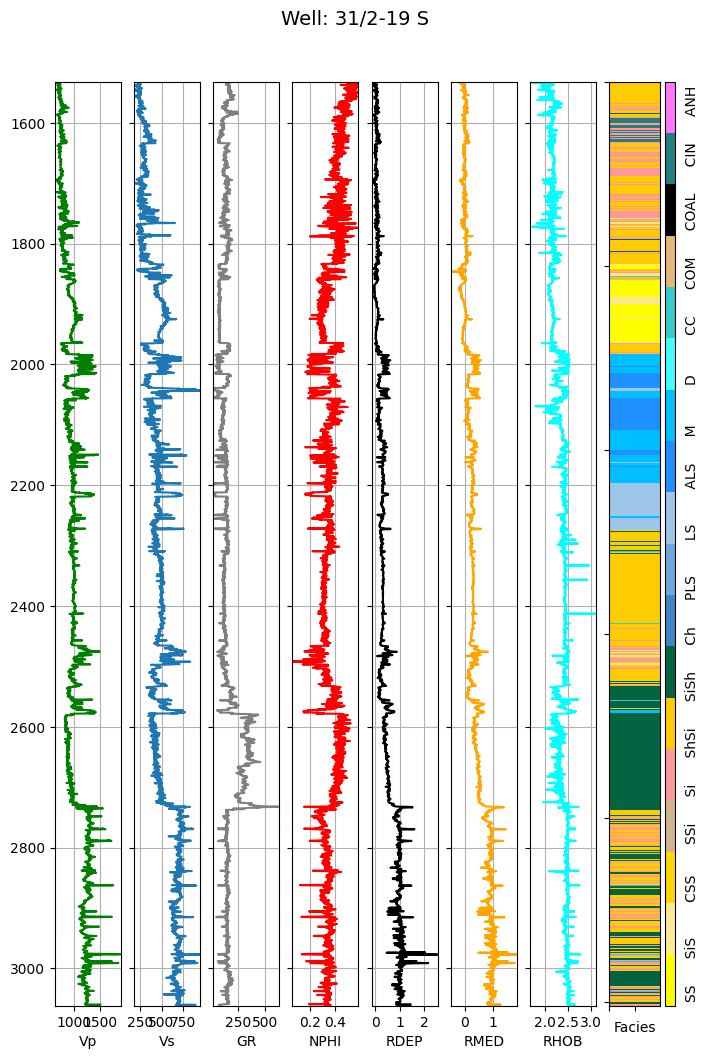

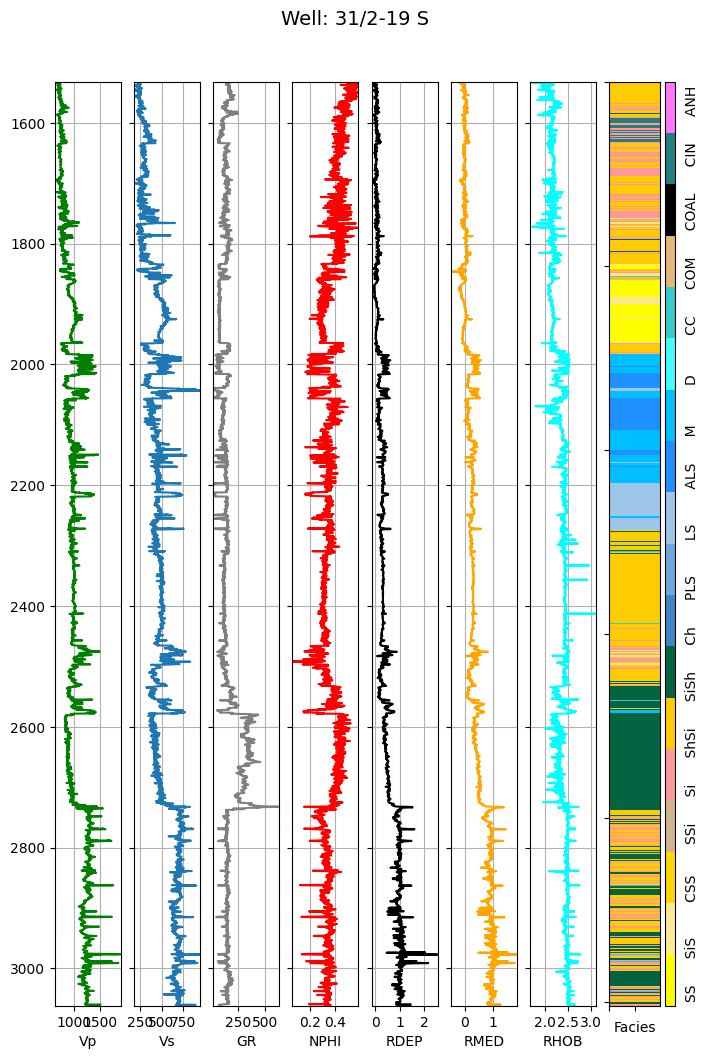

In [20]:
make_facies_log_plot(
    training_data[training_data['WELL'] == '31/2-19 S'],
    facies_colors)

make_facies_log_plot(
    training_data[training_data['WELL'] == '31/2-19 S'],
    facies_colors)

SS       8282
SiS     12448
CSS      3985
SSi      6174
Si      32372
ShSi    37040
SiSh    25963
Ch       3145
PLS      1401
LS      10676
ALS      8567
M       26083
D        2673
CC       2963
COM        44
COAL      322
CIN      2052
ANH       288
Name: Facies, dtype: int64

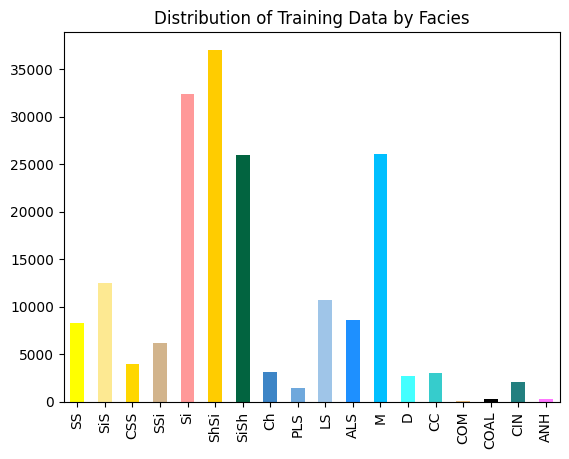

In [21]:
#count the number of unique entries for each facies, sort them by
#facies number (instead of by number of entries)
facies_counts = training_data['Facies'].value_counts().sort_index()
#use facies labels to index each count
facies_counts.index = facies_labels

facies_counts.plot(kind='bar',color=facies_colors, 
                   title='Distribution of Training Data by Facies')
facies_counts

# Conditioning the data set

In [22]:
# correct_labels = training_data[['Vp','Vs']].values
# correct_labels

In [23]:
# correct_labels[0:3]

In [24]:
# df = pd.DataFrame(correct_labels, columns = ['Vp','Vs'])
# df = pd.DataFrame(correct_labels, columns = ['Vp'])

# print(df)

In [25]:
# correct_labels = training_data['Facies'].values
# correct_labels = training_data[['Vp','Vs']].values
# correct_labels = training_data['Vp'].values
correct_labels = training_data['Vs'].values
correct_labels

feature_vectors = training_data.drop(['Vp','Vs','WELL', 'Depth','FaciesLabels','Facies'], axis=1)
feature_vectors.describe()

,GR,NPHI,RDEP,RHOB,RMED
count,184478.000000,184478.000000,184478.000000,184478.000000,184478.000000
mean,84.563754,2.046763,0.438948,2.444904,0.441194
std,42.337080,7.860809,0.455169,0.151253,0.456540
min,0.207500,-0.015100,-0.915044,1.244003,-0.927363
25%,57.835450,0.206200,0.150549,2.359804,0.151370
50%,80.334499,0.281700,0.394047,2.473686,0.403217
75%,105.731672,0.353800,0.674934,2.557400,0.687660
max,1163.366455,61.007858,4.466433,3.217700,4.000000


In [26]:
# Perform Standard scaler for the dataset

from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)

In [27]:
df_scaled_feat = pd.DataFrame(scaled_features,columns=['GR','NPHI','RDEP_log10','RHOB','RMED_log10'])
df_scaled_feat

,GR,NPHI,RDEP_log10,RHOB,RMED_log10
0,0.291623,-0.210559,-1.291284,0.233361,-1.353479
1,0.576630,-0.210623,-1.276200,0.378812,-1.348130
2,0.984200,-0.208499,-1.266348,0.186419,-1.301828
3,1.532130,-0.208511,-1.268311,0.240634,-1.265245
4,1.874290,-0.206183,-1.298705,0.171874,-1.337046
...,...,...,...,...,...
184473,-1.273892,-0.239196,-1.142128,-0.731667,-1.192058
184474,-1.226363,-0.237951,-1.110211,-0.522013,-1.155229
184475,-1.127435,-0.237085,-1.062956,-0.434412,-1.102892
184476,-1.011023,-0.238022,-1.044191,-0.559011,-1.078499


In [28]:
scaled_features

array([[ 0.29162335, -0.21055941, -1.29128427,  0.23336094, -1.35347904],
       [ 0.5766296 , -0.21062302, -1.27620023,  0.3788122 , -1.34813042],
       [ 0.98420002, -0.20849855, -1.2663481 ,  0.1864188 , -1.30182849],
       ...,
       [-1.12743492, -0.23708486, -1.06295636, -0.43441221, -1.10289205],
       [-1.01102317, -0.23802184, -1.04419052, -0.55901063, -1.07849857],
       [-1.11397052, -0.23644993, -1.06148008, -0.7396212 , -1.08905848]])

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
        scaled_features, correct_labels, test_size=0.2, random_state=123)

In [30]:
x_train

array([[-0.40800172, -0.23082456, -0.30750063,  0.57385062, -0.28910941],
       [-0.04028793, -0.22738922,  1.10057459,  0.72235044,  1.12760836],
       [ 0.37387102, -0.2310028 ,  0.10378823,  0.79389069,  0.19568759],
       ...,
       [-0.83456987, -0.2269191 , -0.55722942, -0.78944323, -0.48989781],
       [-1.741324  , -0.24580102, -0.14241921,  0.89119553, -0.12942432],
       [ 0.11222458, -0.22247934, -1.15113327, -1.45851525, -1.18594168]])

In [31]:
import sklearn.metrics as metrics

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

# Conventional ML - SVM Classification

In [32]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [33]:
svm_reg = SVR(gamma='scale', C=1000, kernel='rbf')
svm_reg.fit(x_train, y_train)

SVR(C=1000)

In [34]:
test_pred = svm_reg.predict(x_test)
train_pred = svm_reg.predict(x_train)

In [37]:
test_pred = svm_reg.predict(x_test)
train_pred = svm_reg.predict(x_train)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 66.11298757238852
MSE: 24125.857184058255
RMSE: 155.32500501869703
R2 Square 0.5300401193822819
__________________________________
Train set evaluation:
_____________________________________
MAE: 66.75730913890631
MSE: 25388.74282154129
RMSE: 159.33845368127962
R2 Square 0.5170327784509512
__________________________________


# Conventional ML - RF Classification

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
rf_reg = RandomForestRegressor(n_estimators=1000, random_state=123)
rf_reg.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=123)

In [40]:
test_pred = rf_reg.predict(x_test)
train_pred = rf_reg.predict(x_train)

In [41]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 47.89785777131885
MSE: 11597.110104529273
RMSE: 107.68987930408908
R2 Square 0.7740939756604194
__________________________________
Train set evaluation:
_____________________________________
MAE: 17.738397930348356
MSE: 1651.4430477004094
RMSE: 40.63795083047876
R2 Square 0.9685847831891213
__________________________________


# Conventional ML - XGBoost Classification

In [ ]:
# from sklearn.preprocessing import LabelEncoder  
# le = LabelEncoder()
# y_train_le = le.fit_transform(y_train) # Change class from [1, 2, 3, 4, ..., 9] to [0, 1, 2, 3, ..., 8]

In [42]:
y_train

array([620.50834228, 747.45574099, 589.15161306, ..., 519.97916148,
       781.00532507, 516.5328176 ])

In [ ]:
# y_train_le

In [43]:
# XGB = XGBClassifier(n_estimators = 1000, learning_rate = 0.01, max_depth = 10)
XGB = XGBRegressor(n_estimators = 1000, learning_rate = 0.01, max_depth = 10)
XGB.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [44]:
test_pred = XGB.predict(x_test)
train_pred = XGB.predict(x_train)

In [45]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 54.80337755242281
MSE: 12909.368428366064
RMSE: 113.61940163707105
R2 Square 0.748531826282471
__________________________________
Train set evaluation:
_____________________________________
MAE: 45.02592917355211
MSE: 6800.206559408175
RMSE: 82.46336495322134
R2 Square 0.8706404294595316
__________________________________


In [ ]:
# y_pred_XGB_ = XGB.predict(x_test)
# y_pred_XGB = le.inverse_transform(y_pred_XGB_) # Change class back from [0, 1, 2, 3, ..., 8] to [1, 2, 3, 4, ..., 9]
# y_pred_XGB

In [ ]:
# from sklearn.metrics import accuracy_score
# # The confusion matrix helps visualize the performance of the algorithm.
# cm = metrics.confusion_matrix(y_test, y_pred_XGB)

# # compute and print accuracy score
# # compute and print accuracy score
# print('Training Accuracy is: {0:0.4f}'. format(XGB.fit(x_train, y_train_le).score(x_train, y_train_le)))
# print('Testing Accuracy is: {0:0.4f}'. format(accuracy_score(y_test, y_pred_XGB)))

In [ ]:
# %matplotlib inline
# import matplotlib.pyplot as plt

# from IPython.display import Image, display

# fig, ax = plt.subplots(figsize=(5, 5))
# ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
# for i in range(cm.shape[0]):
#      for j in range(cm.shape[1]):
#          ax.text(x=j, y=i,
#                 s=cm[i, j], 
#                 va='center', ha='center')
# plt.xlabel('Predicted Values')
# plt.ylabel('Actual Values')

# x1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
# squad = ['1 (SS)','2 (SiS)','3 (CSS)','4 (SSi)','5 (Si)','6 (ShSi)','7 (SiSh)','8 (Ch)','9 (PLS)','10 (LS)',
#          '11 (ALS)', '12 (M)', '13 (D)', '14 (CC)', '15 (COM)', '16 (COAL)', '17 (CIN)', '18 (ANH)']

# ax.set_xticks(x1)
# ax.set_xticklabels(squad, minor=False, rotation=90)
# ax.set_yticks(x1)
# ax.set_yticklabels(squad)

# plt.show()
# print(classification_report(y_test, y_pred_XGB))

## Applying the classification model to the blind data

We held a well back from the training, and stored it in a dataframe called `blind`:

In [46]:
# blind
blind_test = blind.drop(['Vp','Vs','WELL', 'Depth','Facies'], axis=1)
x_blind = scaler.transform(blind_test)
x_blind

array([[ 0.06522782, -0.22107999,  0.06834637, -0.37952238,  0.05115761],
       [ 0.08637198, -0.22133421, -0.11612646, -0.57506679, -0.20025146],
       [ 0.13438475, -0.22609221, -0.17360218, -0.55604877, -0.28603376],
       ...,
       [ 0.86204167, -0.2379367 ,  0.74630839,  0.63200653,  0.7218558 ],
       [ 0.92666172, -0.23755447,  0.71374389,  0.5091578 ,  0.69951968],
       [ 0.86410467, -0.23672794,  0.70573524,  0.45753091,  0.68784932]])

## SVC Prediction

In [47]:
y_pred_SVC = svm_reg.predict(x_blind)
# blind['Prediction_SVC'] = y_pred_SVC.astype(float)

In [48]:
y_pred_SVC

array([578.25829396, 557.27211252, 577.35089661, 605.19557871,
       635.96659141, 597.41938278, 558.50371027, 543.17950589,
       506.18836323, 509.03081349, 494.98387778, 534.45860035,
       502.77853503, 480.20073543, 495.76662112, 500.74577434,
       538.04931559, 608.11250824, 662.30157701, 660.0450425 ,
       647.86553755, 565.16049693, 542.29386192, 473.68019589,
       509.75000142, 496.85925727, 504.61447147, 536.10931592,
       548.2417852 , 553.27425448, 548.93693234, 527.61501559,
       599.55196236, 575.26389971, 595.54794398, 581.84955696,
       561.38034257, 571.77969927, 573.3984578 , 548.04638401,
       551.77174342, 559.55874507, 534.18074161, 504.38769259,
       509.73712864, 522.82983478, 522.5393899 , 551.63426205,
       555.72975498, 542.91793998, 538.35432796, 550.79155554,
       547.39193271, 565.32080561, 568.51807169, 515.93274357,
       549.80298621, 580.91373914, 559.85282185, 524.51036867,
       480.16706899, 506.76456415, 479.47431514, 518.13

In [62]:
# DF = pd.DataFrame(y_pred_SVC)
# DF.to_csv("well_32_Vs_pred_SVM.csv")

In [49]:
blind['Vs']

71878    573.659927
71879    567.605814
71880    550.174595
71881    530.339814
71882    520.258081
            ...    
72114    597.621460
72115    594.078595
72116    589.132812
72117    585.418683
72118    589.614663
Name: Vs, Length: 241, dtype: float64

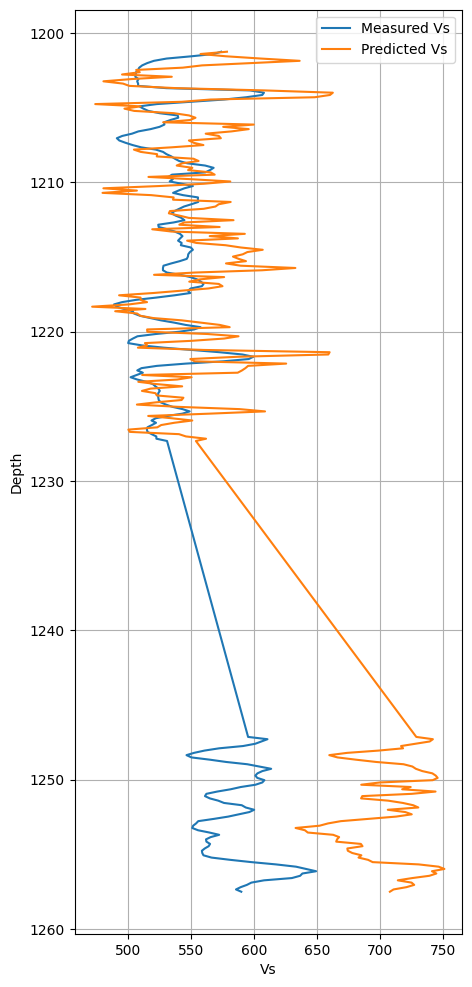

In [50]:
plt.plot(blind['Vs'],blind['Depth'],label="Measured Vs")
plt.plot(y_pred_SVC,blind['Depth'],label="Predicted Vs")
plt.legend()
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel("Vs")
plt.ylabel("Depth")
plt.legend()
fig = plt.gcf()
fig.set_size_inches(5, 12)
# fig.savefig('Vp_pred_6.png', dpi=100)

In [51]:
print_evaluate(blind['Vs'], y_pred_SVC)

MAE: 54.81726766742904
MSE: 5206.6221438183675
RMSE: 72.15692720604424
R2 Square -3.6059324347793487
__________________________________


In [52]:
# Calculate Average Error
# s_vp = Vp_pred / Vp_meas
# s_vs = Vs_pred / Vs_meas
#Error_vp = (abs(1-s_vp)/(1)) * 100

import statistics
s_vs = y_pred_SVC / blind['Vs']
Error_vs = (abs(1 - s_vs)/1) * 100
Error_vs = statistics.mean(Error_vs)

# Pearson's coefficient correlation
Pearson = np.corrcoef(y_pred_SVC,blind['Vs'])

print('Average Error Vs =',Error_vs)
print('Pearson =',Pearson[1,0])

Average Error Vs = 9.743178481895308
Pearson = 0.8111206567452218


# RFC Prediction

In [53]:
y_pred_RF = rf_reg.predict(x_blind)

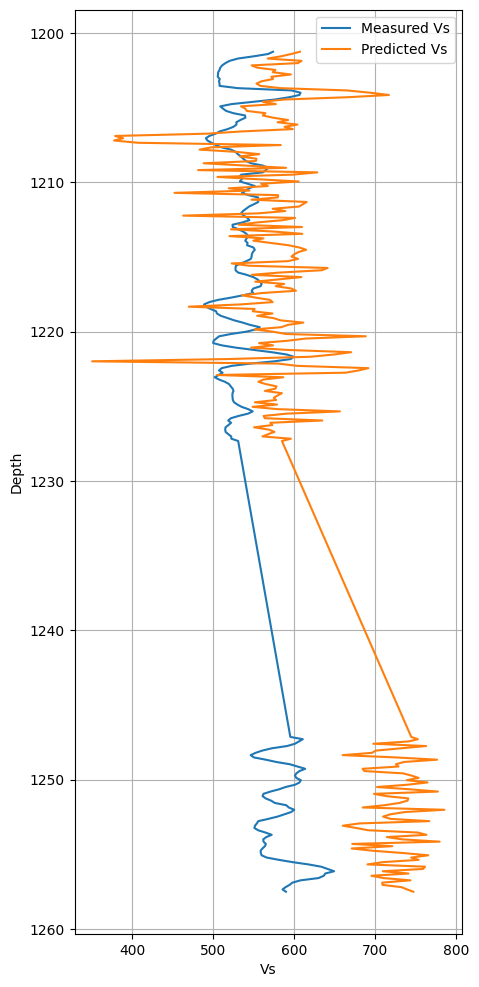

In [54]:
plt.plot(blind['Vs'],blind['Depth'],label="Measured Vs")
plt.plot(y_pred_RF,blind['Depth'],label="Predicted Vs")
plt.legend()
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel("Vs")
plt.ylabel("Depth")
plt.legend()
fig = plt.gcf()
fig.set_size_inches(5, 12)
# fig.savefig('Vp_pred_6.png', dpi=100)

In [55]:
print_evaluate(blind['Vs'], y_pred_RF)

MAE: 77.28789740793938
MSE: 8827.711094470333
RMSE: 93.95589973211013
R2 Square -6.809255162323687
__________________________________


In [56]:
# Calculate Average Error
# s_vp = Vp_pred / Vp_meas
# s_vs = Vs_pred / Vs_meas
#Error_vp = (abs(1-s_vp)/(1)) * 100

import statistics
s_vs = y_pred_RF / blind['Vs']
Error_vs = (abs(1 - s_vs)/1) * 100
Error_vs = statistics.mean(Error_vs)

# Pearson's coefficient correlation
Pearson = np.corrcoef(y_pred_RF,blind['Vs'])

print('Average Error Vs =',Error_vs)
print('Pearson =',Pearson[1,0])

Average Error Vs = 13.935974030653634
Pearson = 0.6984679573907551


In [64]:
# DF = pd.DataFrame(y_pred_RF)
# DF.to_csv("well_32_Vs_pred_RF.csv")

# XGBoost Prediction

In [57]:
y_pred_XGB = XGB.predict(x_blind)

In [58]:
y_pred_RF

array([606.86275102, 596.24559888, 583.77645016, 567.10372179,
       608.78572931, 604.50409421, 547.26032829, 554.12343671,
       576.60022472, 573.40362377, 595.72759245, 571.69763577,
       573.59588858, 559.49273044, 553.24550809, 558.07341523,
       582.64220865, 664.63927634, 693.33841857, 716.68239993,
       665.0823115 , 586.98470201, 560.851006  , 577.15440536,
       534.14745051, 539.47348842, 541.32228823, 564.34155857,
       561.0536216 , 574.12464727, 592.36132811, 579.38493174,
       603.86357914, 587.89973256, 598.07324194, 535.54760279,
       492.80576804, 378.98764206, 388.83067881, 377.59514298,
       407.28095014, 583.32191246, 497.73656619, 483.1417719 ,
       528.78452925, 556.7334532 , 532.66255069, 553.23325999,
       552.60150082, 488.02567229, 540.0551409 , 589.70794158,
       481.30644184, 628.37692104, 598.03831116, 505.12097036,
       553.82247356, 605.33463648, 559.00158164, 567.35215393,
       519.05107416, 544.61471144, 452.10683924, 579.95

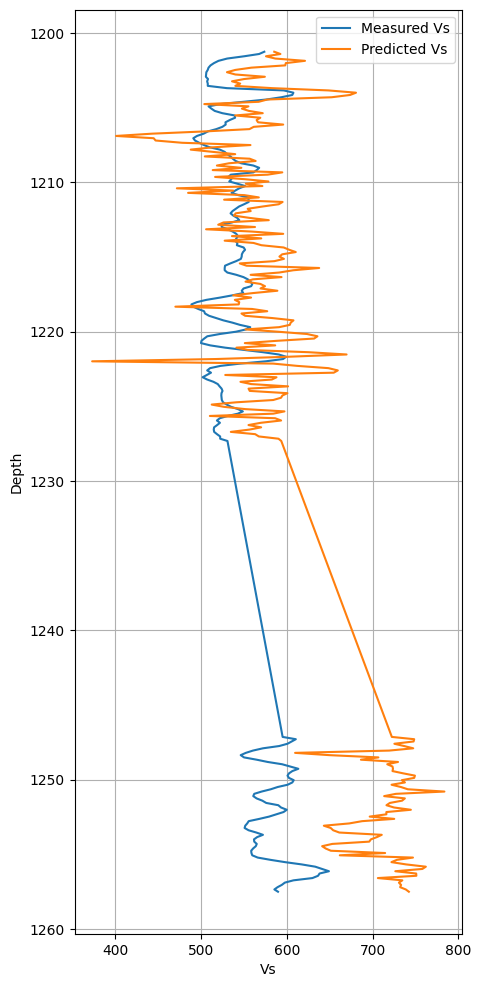

In [59]:
plt.plot(blind['Vs'],blind['Depth'],label="Measured Vs")
plt.plot(y_pred_XGB,blind['Depth'],label="Predicted Vs")
plt.legend()
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel("Vs")
plt.ylabel("Depth")
plt.legend()
fig = plt.gcf()
fig.set_size_inches(5, 12)
# fig.savefig('Vp_pred_6.png', dpi=100)

In [60]:
print_evaluate(blind['Vs'], y_pred_XGB)

MAE: 67.94888159715296
MSE: 7094.422435118845
RMSE: 84.22839447074155
R2 Square -5.275936585629842
__________________________________


In [61]:
# Calculate Average Error
# s_vp = Vp_pred / Vp_meas
# s_vs = Vs_pred / Vs_meas
#Error_vp = (abs(1-s_vp)/(1)) * 100

import statistics
s_vs = y_pred_XGB / blind['Vs']
Error_vs = (abs(1 - s_vs)/1) * 100
Error_vs = statistics.mean(Error_vs)

# Pearson's coefficient correlation
Pearson = np.corrcoef(y_pred_XGB,blind['Vs'])

print('Average Error Vs =',Error_vs)
print('Pearson =',Pearson[1,0])

Average Error Vs = 12.198098983845114
Pearson = 0.7415502216132795


In [65]:
# DF = pd.DataFrame(y_pred_XGB)
# DF.to_csv("well_32_Vs_pred_XGB.csv")